<a href="https://colab.research.google.com/github/aynokt/q-macro2/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Tauchen's method to discretize the AR(1) process
def tauchen(n, mu, rho, sigma):
    m = 1 / np.sqrt(1 - rho**2)
    state_space = np.linspace(mu - m * sigma, mu + m * sigma, n)
    d = (state_space[-1] - state_space[0]) / (n - 1)
    transition_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if j == 0:
                transition_matrix[i, 0] = norm.cdf((state_space[0] - rho * state_space[i] + d / 2) / sigma)
            elif j == n - 1:
                transition_matrix[i, n - 1] = 1.0 - norm.cdf((state_space[n - 1] - rho * state_space[i] - d / 2) / sigma)
            else:
                transition_matrix[i, j] = norm.cdf((state_space[j] - rho * state_space[i] + d / 2) / sigma) - norm.cdf((state_space[j] - rho * state_space[i] - d / 2) / sigma)

    return transition_matrix, state_space

# Set parameters function
def set_parameters(
    sigma=1.5,  # Risk aversion
    beta=0.98,  # Time preference factor
    rho=0.6,  # Labor productivity persistence
    sigma_eps=0.6,  # Labor productivity std
    a_l=0,  # Lower bound of asset grids
    a_u=20,  # Upper bound of asset grids
    NA=401,  # Number of grids of assets
    NH=2,  # Number of grids of labor productivity
    mu_h=-0.7,  # Mean of log h
    alpha=0.25,
    delta=0.03,
):
    pi, h = tauchen(NH, mu_h, rho, sigma_eps)
    h = np.exp(h)

    param = {
        'sigma': sigma,
        'beta': beta,
        'pi': pi,
        'h': h,
        'NA': NA,
        'NH': NH,
        'a_l': a_l,
        'a_u': a_u,
        'alpha': alpha,
        'delta': delta,
    }

    return param

# Household solution function
def solve_household(param, r, w):
    NA = param['NA']
    NH = param['NH']
    h = param['h']
    a_l = param['a_l']
    a_u = param['a_u']
    sigma = param['sigma']
    beta = param['beta']
    pi = param['pi']

    a = np.linspace(a_l, a_u, NA)
    util = np.full((NA, NA, NH), -10000.0)

    for ia in range(NA):
        for ih in range(NH):
            for iap in range(NA):
                cons = w * h[ih] + (1.0 + r) * a[ia] - a[iap]
                if cons > 0:
                    util[iap, ia, ih] = cons**(1.0 - sigma) / (1.0 - sigma)

    v = np.zeros((NA, NH))
    c = np.zeros((NA, NH))
    aplus = np.zeros((NA, NH))
    v_new = np.zeros((NA, NH))
    iaplus = np.full((NA, NH), -10000)

    tol = 1e-6
    test = 10.0
    reward = np.zeros((NA, NA, NH))

    while test > tol:
        for ia in range(NA):
            for ih in range(NH):
                reward[:, ia, ih] = util[:, ia, ih]
                for ihp in range(NH):
                    reward[:, ia, ih] += beta * pi[ih, ihp] * v[:, ihp]

                v_new[ia, ih] = np.max(reward[:, ia, ih])
                iaplus[ia, ih] = np.argmax(reward[:, ia, ih])

        test = np.max(abs(v_new - v))
        v = v_new

    aplus = a[iaplus]

    for ia in range(NA):
        for ih in range(NH):
            c[ia, ih] = w * h[ih] + (1.0 + r) * a[ia] - aplus[ia, ih]

    return aplus, iaplus, c

# Set parameters and solve the household problem
r = 0.04
w = 1
param = set_parameters()
decisions = solve_household(param, r, w)
aplus = decisions[0]
c = decisions[2]



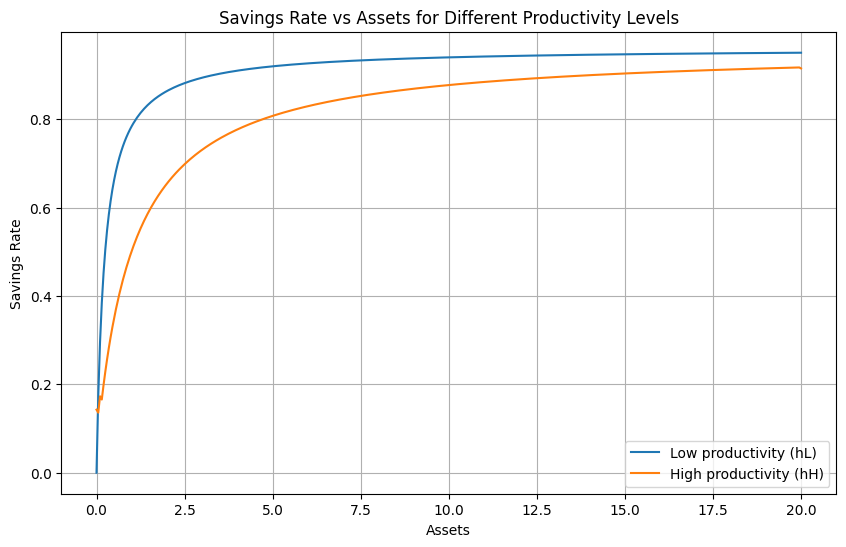

In [ ]:

# Parameters
def setPar(sigma=1.5, beta=0.98, rho=0.6, sigma_eps=0.6, a_l=0, a_u=20, NA=401, NH=2, mu_h=-0.7, alpha=0.25, delta=0.03):
    pi, h = tauchen(NH, mu_h, rho, sigma_eps)
    h = np.exp(h)
    param = {
        'sigma': sigma,
        'beta': beta,
        'pi': pi,
        'h': h,
        'NA': NA,
        'NH': NH,
        'a_l': a_l,
        'a_u': a_u,
        'alpha': alpha,
        'delta': delta
    }
    return param

# Household problem solver
def solve_household(param, r, w):
    NA = param['NA']
    NH = param['NH']
    h = param['h']
    a_l = param['a_l']
    a_u = param['a_u']
    sigma = param['sigma']
    beta = param['beta']
    pi = param['pi']

    a = np.linspace(a_l, a_u, NA)
    util = np.full((NA, NA, NH), -10000.0)

    for ia in range(NA):
        for ih in range(NH):
            for iap in range(NA):
                cons = w * h[ih] + (1.0 + r) * a[ia] - a[iap]
                if cons > 0:
                    util[iap, ia, ih] = cons**(1.0 - sigma) / (1.0 - sigma)

    v = np.zeros((NA, NH))
    c = np.zeros((NA, NH))
    aplus = np.zeros((NA, NH))
    v_new = np.zeros((NA, NH))
    iaplus = np.full((NA, NH), -10000)

    tol = 1e-6
    test = 10.0
    reward = np.zeros((NA, NA, NH))

    while test > tol:
        for ia in range(NA):
            for ih in range(NH):
                reward[:, ia, ih] = util[:, ia, ih]
                for ihp in range(NH):
                    reward[:, ia, ih] += beta * pi[ih, ihp] * v[:, ihp]

                v_new[ia, ih] = np.max(reward[:, ia, ih])
                iaplus[ia, ih] = np.argmax(reward[:, ia, ih])

        test = np.max(abs(v_new - v))
        v = v_new

    aplus = a[iaplus]

    for ia in range(NA):
        for ih in range(NH):
            c[ia, ih] = w * h[ih] + (1.0 + r) * a[ia] - aplus[ia, ih]

    return aplus, iaplus, c

# Main code for problem 1
param = setPar()
r = 0.04
w = 1
decisions = solve_household(param, r, w)
aplus = decisions[0]
c = decisions[2]

a_l = param['a_l']
a_u = param['a_u']
NA = param['NA']
a = np.linspace(a_l, a_u, NA)

# Calculate savings rate
savings_rate_low = aplus[:, 0] / (c[:, 0] + aplus[:, 0])
savings_rate_high = aplus[:, 1] / (c[:, 1] + aplus[:, 1])

# Plot savings rate
plt.figure(figsize=(10, 6))
plt.plot(a, savings_rate_low, label='Low productivity (hL)')
plt.plot(a, savings_rate_high, label='High productivity (hH)')
plt.xlabel('Assets')
plt.ylabel('Savings Rate')
plt.legend()
plt.title('Savings Rate vs Assets for Different Productivity Levels')
plt.grid(True)
plt.show()

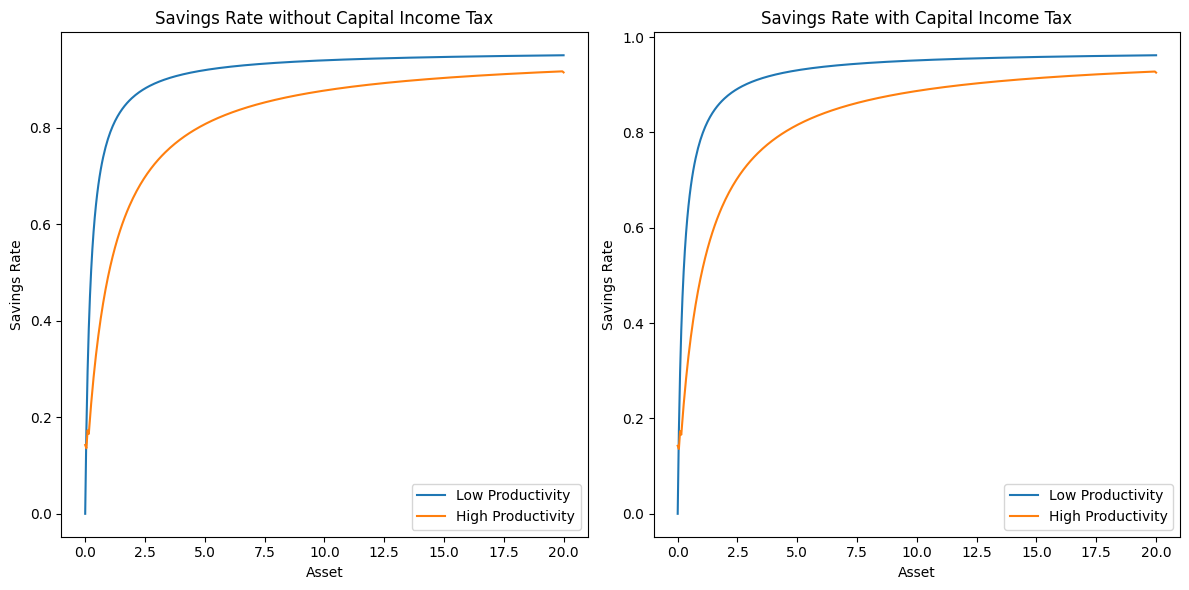

In [ ]:
# Household solution function considering capital income tax
def solve_household_with_tax(param, r, w, tau_k):
    NA = param['NA']
    NH = param['NH']
    h = param['h']
    a_l = param['a_l']
    a_u = param['a_u']
    sigma = param['sigma']
    beta = param['beta']
    pi = param['pi']

    a = np.linspace(a_l, a_u, NA)
    util = np.full((NA, NA, NH), -10000.0)

    for ia in range(NA):
        for ih in range(NH):
            for iap in range(NA):
                cons = w * h[ih] + (1.0 + (1 - tau_k) * r) * a[ia] - a[iap]
                if cons > 0:
                    util[iap, ia, ih] = cons**(1.0 - sigma) / (1.0 - sigma)

    v = np.zeros((NA, NH))
    c = np.zeros((NA, NH))
    aplus = np.zeros((NA, NH))
    v_new = np.zeros((NA, NH))
    iaplus = np.full((NA, NH), -10000)

    tol = 1e-6
    test = 10.0
    reward = np.zeros((NA, NA, NH))

    while test > tol:
        for ia in range(NA):
            for ih in range(NH):
                reward[:, ia, ih] = util[:, ia, ih]
                for ihp in range(NH):
                    reward[:, ia, ih] += beta * pi[ih, ihp] * v[:, ihp]

                v_new[ia, ih] = np.max(reward[:, ia, ih])
                iaplus[ia, ih] = np.argmax(reward[:, ia, ih])

        test = np.max(abs(v_new - v))
        v = v_new

    aplus = a[iaplus]

    for ia in range(NA):
        for ih in range(NH):
            c[ia, ih] = w * h[ih] + (1.0 + (1 - tau_k) * r) * a[ia] - aplus[ia, ih]

    return aplus, iaplus, c

# Set parameters and solve the household problem without capital income tax
r = 0.04
w = 1
param = set_parameters()
decisions_no_tax = solve_household(param, r, w)
aplus_no_tax = decisions_no_tax[0]
c_no_tax = decisions_no_tax[2]

# Set parameters and solve the household problem with capital income tax
tau_k = 0.3
decisions_with_tax = solve_household_with_tax(param, r, w, tau_k)
aplus_with_tax = decisions_with_tax[0]
c_with_tax = decisions_with_tax[2]

# Grids for plotting
a_l = param['a_l']
a_u = param['a_u']
NA = param['NA']
a = np.linspace(a_l, a_u, NA)

# Plot savings rates
plt.figure(figsize=(12, 6))

# Savings rate without capital income tax
plt.subplot(1, 2, 1)
plt.plot(a, aplus_no_tax[:, 0] / (c_no_tax[:, 0] + aplus_no_tax[:, 0]), label='Low Productivity')
plt.plot(a, aplus_no_tax[:, 1] / (c_no_tax[:, 1] + aplus_no_tax[:, 1]), label='High Productivity')
plt.xlabel("Asset")
plt.ylabel("Savings Rate")
plt.legend()
plt.title("Savings Rate without Capital Income Tax")

# Savings rate with capital income tax
plt.subplot(1, 2, 2)
plt.plot(a, aplus_with_tax[:, 0] / (c_with_tax[:, 0] + aplus_with_tax[:, 0]), label='Low Productivity')
plt.plot(a, aplus_with_tax[:, 1] / (c_with_tax[:, 1] + aplus_with_tax[:, 1]), label='High Productivity')
plt.xlabel("Asset")
plt.ylabel("Savings Rate")
plt.legend()
plt.title("Savings Rate with Capital Income Tax")

plt.tight_layout()
plt.show()

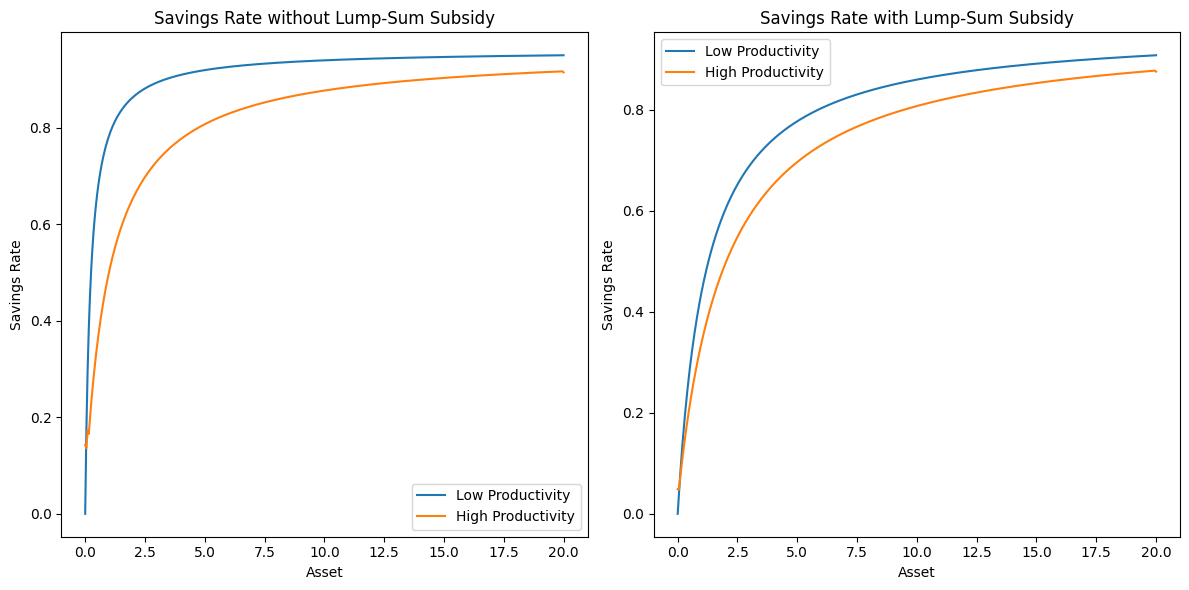

In [ ]:
# Household solution function considering lump-sum subsidy
def solve_household_with_subsidy(param, r, w, T):
    NA = param['NA']
    NH = param['NH']
    h = param['h']
    a_l = param['a_l']
    a_u = param['a_u']
    sigma = param['sigma']
    beta = param['beta']
    pi = param['pi']

    a = np.linspace(a_l, a_u, NA)
    util = np.full((NA, NA, NH), -10000.0)

    for ia in range(NA):
        for ih in range(NH):
            for iap in range(NA):
                cons = w * h[ih] + (1.0 + r) * a[ia] + T - a[iap]
                if cons > 0:
                    util[iap, ia, ih] = cons**(1.0 - sigma) / (1.0 - sigma)

    v = np.zeros((NA, NH))
    c = np.zeros((NA, NH))
    aplus = np.zeros((NA, NH))
    v_new = np.zeros((NA, NH))
    iaplus = np.full((NA, NH), -10000)

    tol = 1e-6
    test = 10.0
    reward = np.zeros((NA, NA, NH))

    while test > tol:
        for ia in range(NA):
            for ih in range(NH):
                reward[:, ia, ih] = util[:, ia, ih]
                for ihp in range(NH):
                    reward[:, ia, ih] += beta * pi[ih, ihp] * v[:, ihp]

                v_new[ia, ih] = np.max(reward[:, ia, ih])
                iaplus[ia, ih] = np.argmax(reward[:, ia, ih])

        test = np.max(abs(v_new - v))
        v = v_new

    aplus = a[iaplus]

    for ia in range(NA):
        for ih in range(NH):
            c[ia, ih] = w * h[ih] + (1.0 + r) * a[ia] + T - aplus[ia, ih]

    return aplus, iaplus, c

# Set parameters and solve the household problem without lump-sum subsidy
r = 0.04
w = 1
param = set_parameters()
decisions_no_tax = solve_household(param, r, w)
aplus_no_tax = decisions_no_tax[0]
c_no_tax = decisions_no_tax[2]

# Set parameters and solve the household problem with lump-sum subsidy
T = 1
decisions_with_subsidy = solve_household_with_subsidy(param, r, w, T)
aplus_with_subsidy = decisions_with_subsidy[0]
c_with_subsidy = decisions_with_subsidy[2]

# Grids for plotting
a_l = param['a_l']
a_u = param['a_u']
NA = param['NA']
a = np.linspace(a_l, a_u, NA)

# Plot savings rates
plt.figure(figsize=(12, 6))

# Savings rate without lump-sum subsidy
plt.subplot(1, 2, 1)
plt.plot(a, aplus_no_tax[:, 0] / (c_no_tax[:, 0] + aplus_no_tax[:, 0]), label='Low Productivity')
plt.plot(a, aplus_no_tax[:, 1] / (c_no_tax[:, 1] + aplus_no_tax[:, 1]), label='High Productivity')
plt.xlabel("Asset")
plt.ylabel("Savings Rate")
plt.legend()
plt.title("Savings Rate without Lump-Sum Subsidy")

# Savings rate with lump-sum subsidy
plt.subplot(1, 2, 2)
plt.plot(a, aplus_with_subsidy[:, 0] / (c_with_subsidy[:, 0] + aplus_with_subsidy[:, 0]), label='Low Productivity')
plt.plot(a, aplus_with_subsidy[:, 1] / (c_with_subsidy[:, 1] + aplus_with_subsidy[:, 1]), label='High Productivity')
plt.xlabel("Asset")
plt.ylabel("Savings Rate")
plt.legend()
plt.title("Savings Rate with Lump-Sum Subsidy")

plt.tight_layout()
plt.show()

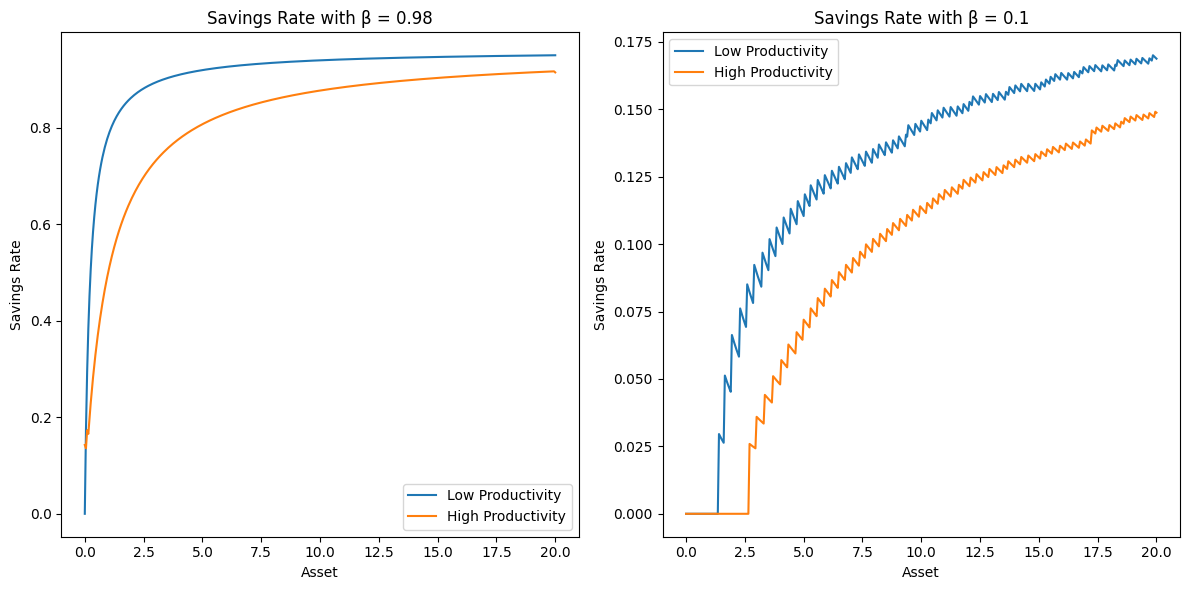

In [ ]:
# Household solution function without tax or subsidy
def solve_household(param, r, w):
    NA = param['NA']
    NH = param['NH']
    h = param['h']
    a_l = param['a_l']
    a_u = param['a_u']
    sigma = param['sigma']
    beta = param['beta']
    pi = param['pi']

    a = np.linspace(a_l, a_u, NA)
    util = np.full((NA, NA, NH), -10000.0)

    for ia in range(NA):
        for ih in range(NH):
            for iap in range(NA):
                cons = w * h[ih] + (1.0 + r) * a[ia] - a[iap]
                if cons > 0:
                    util[iap, ia, ih] = cons**(1.0 - sigma) / (1.0 - sigma)

    v = np.zeros((NA, NH))
    c = np.zeros((NA, NH))
    aplus = np.zeros((NA, NH))
    v_new = np.zeros((NA, NH))
    iaplus = np.full((NA, NH), -10000)

    tol = 1e-6
    test = 10.0
    reward = np.zeros((NA, NA, NH))

    while test > tol:
        for ia in range(NA):
            for ih in range(NH):
                reward[:, ia, ih] = util[:, ia, ih]
                for ihp in range(NH):
                    reward[:, ia, ih] += beta * pi[ih, ihp] * v[:, ihp]

                v_new[ia, ih] = np.max(reward[:, ia, ih])
                iaplus[ia, ih] = np.argmax(reward[:, ia, ih])

        test = np.max(abs(v_new - v))
        v = v_new

    aplus = a[iaplus]

    for ia in range(NA):
        for ih in range(NH):
            c[ia, ih] = w * h[ih] + (1.0 + r) * a[ia] - aplus[ia, ih]

    return aplus, iaplus, c

# Set parameters and solve the household problem for different beta values
r = 0.04
w = 1
param = set_parameters()

# Scenario 1: Original beta = 0.98
beta_original = 0.98
param['beta'] = beta_original
decisions_original = solve_household(param, r, w)
aplus_original = decisions_original[0]
c_original = decisions_original[2]

# Scenario 2: Lower beta = 0.1
beta_lower = 0.1
param['beta'] = beta_lower
decisions_lower = solve_household(param, r, w)
aplus_lower = decisions_lower[0]
c_lower = decisions_lower[2]

# Grids for plotting
a_l = param['a_l']
a_u = param['a_u']
NA = param['NA']
a = np.linspace(a_l, a_u, NA)

# Plot savings rates for different beta values
plt.figure(figsize=(12, 6))

# Savings rate with original beta
plt.subplot(1, 2, 1)
plt.plot(a, aplus_original[:, 0] / (c_original[:, 0] + aplus_original[:, 0]), label='Low Productivity')
plt.plot(a, aplus_original[:, 1] / (c_original[:, 1] + aplus_original[:, 1]), label='High Productivity')
plt.xlabel("Asset")
plt.ylabel("Savings Rate")
plt.legend()
plt.title("Savings Rate with β = 0.98")

# Savings rate with lower beta
plt.subplot(1, 2, 2)
plt.plot(a, aplus_lower[:, 0] / (c_lower[:, 0] + aplus_lower[:, 0]), label='Low Productivity')
plt.plot(a, aplus_lower[:, 1] / (c_lower[:, 1] + aplus_lower[:, 1]), label='High Productivity')
plt.xlabel("Asset")
plt.ylabel("Savings Rate")
plt.legend()
plt.title("Savings Rate with β = 0.1")

plt.tight_layout()
plt.show()
